# Exploring Audio Processing

| Date | User | Change Type | Remarks |  
| ---- | ---- | ----------- | ------- |
| 29/04/2025   | Martin | Create  | Notebook created to explore audio processing for potential Machine Learning applications. | 

# Content

* [Details on Audio](#details-on-audio)
* [Exploring Audio Data](#exploring-audio-data)

# Details on Audio

<u>Terminology</u>

* __Sampling Rate__ - Number of times per second that a sound wave's amplitude is measured and recorded. Usually measured in kHz. A higher sampling rate means more measurements are taken which leads to higher audio fidelity
* __Audio Frequency__ - (or audible frequency) The periodic vibrations whose frequency is audible to the average human - the property of sound that most determines pitch. Highest possible frequency for digitally encoded audio is half of the sampling rate
* __Bandwidth__ - Difference between the highest and lowest frequencies in an audio stream

<u>Spectrogram</u>

* Visual representations of audio - representing time, frequency and amplitude. Represents frequencies on y-axis, time on x-axis and colour as amplitude
* The amplitude represents the "volume" of that frequency - Meaning that it's more pronounced
* When data is presented in 3D plot, they may be called _waterfalls_ 

# Exploring Audio Data

In [16]:
import librosa
import librosa.display
import pandas as pd
import IPython.display as ipd
import matplotlib.pyplot as plt

In [14]:
# Loading audio data
audio_path = './data/train_audio/21038/iNat65519.ogg'
soundscape_path = './data/train_soundscapes/H02_20230420_074000.ogg'
SR = 32_000

audio, audio_sr = librosa.load(audio_path, sr=SR)
soundscape, ss_sr = librosa.load(soundscape_path, sr=SR)

In [ ]:
# Playing the audio file
ipd.Audio(soundscape_path)

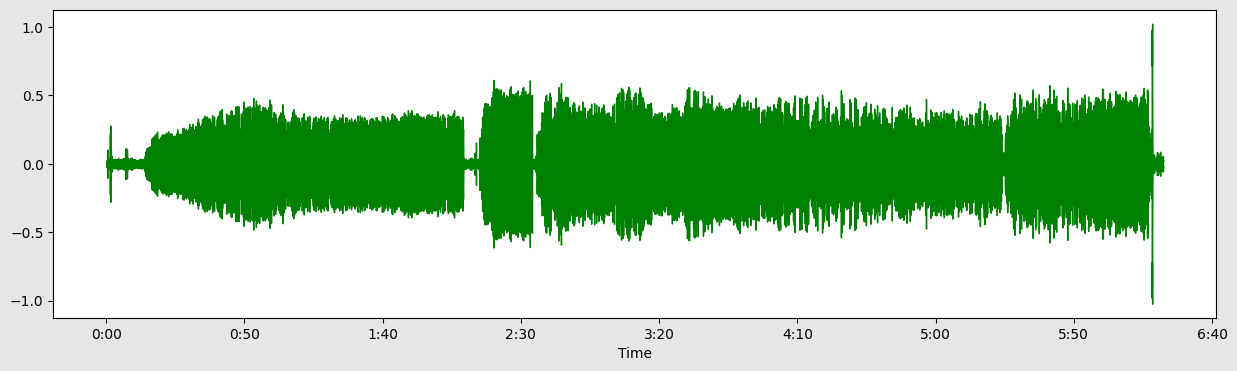

In [20]:
# Viewing data as a waveform visualisation
plt.figure(figsize=(15, 4), facecolor=(.9, .9, .9))
librosa.display.waveshow(audio, sr=SR, color='green')

In [21]:
# Viewing a Spectrogram
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))

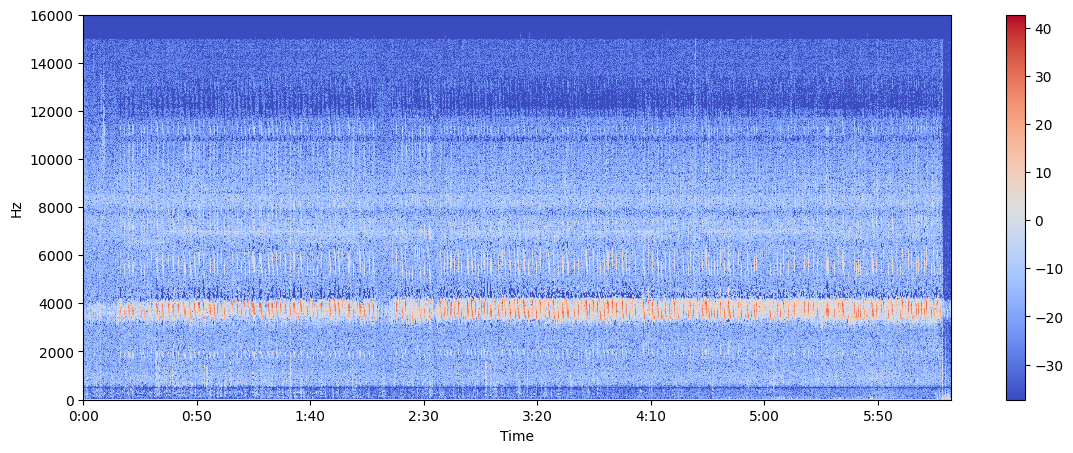

In [24]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=SR, x_axis='time', y_axis='hz')
plt.colorbar()